# 7.2 BERT model on Yelp reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dataset import Dataset

# Calibration analysis

In [2]:
df = pd.read_csv('data/yelp_out.csv', index_col=0)
var='Length (characters)'
df = Dataset(df, cal_size=10000)

In [3]:
df.augmented_z_calibrate(var=var, label="_betaz")

In [4]:
splits = df.get_splits(var, max_depth=3, min_samples_leaf=int(len(df.df_cal)/10))

In [5]:
df.split_calibrate(var, splits)

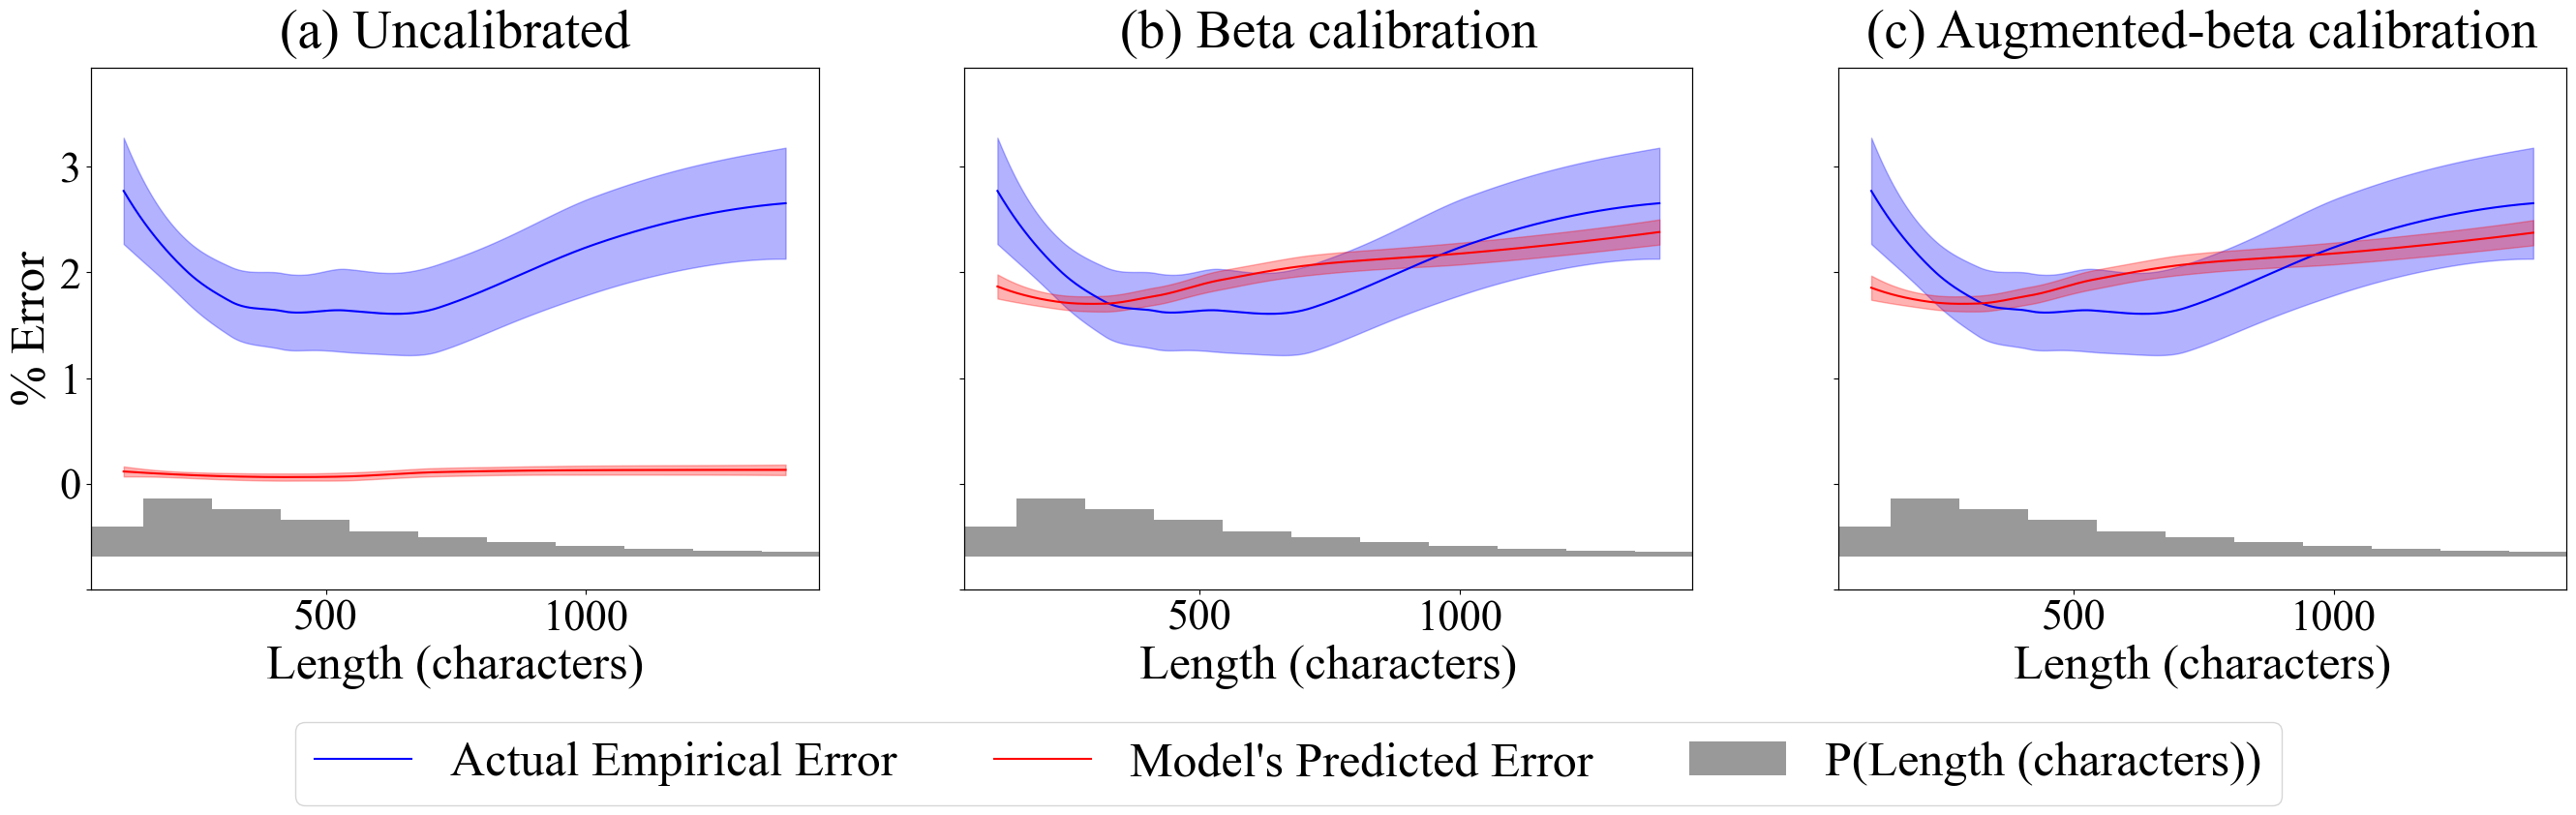

In [6]:
df.plot_compare(var=var,s=0.8,  d=-0.0009, d2=-1, d3=.5, title3="Augmented-beta calibration", label3="_betaz", filename='figs/yelp_comparison2.png')

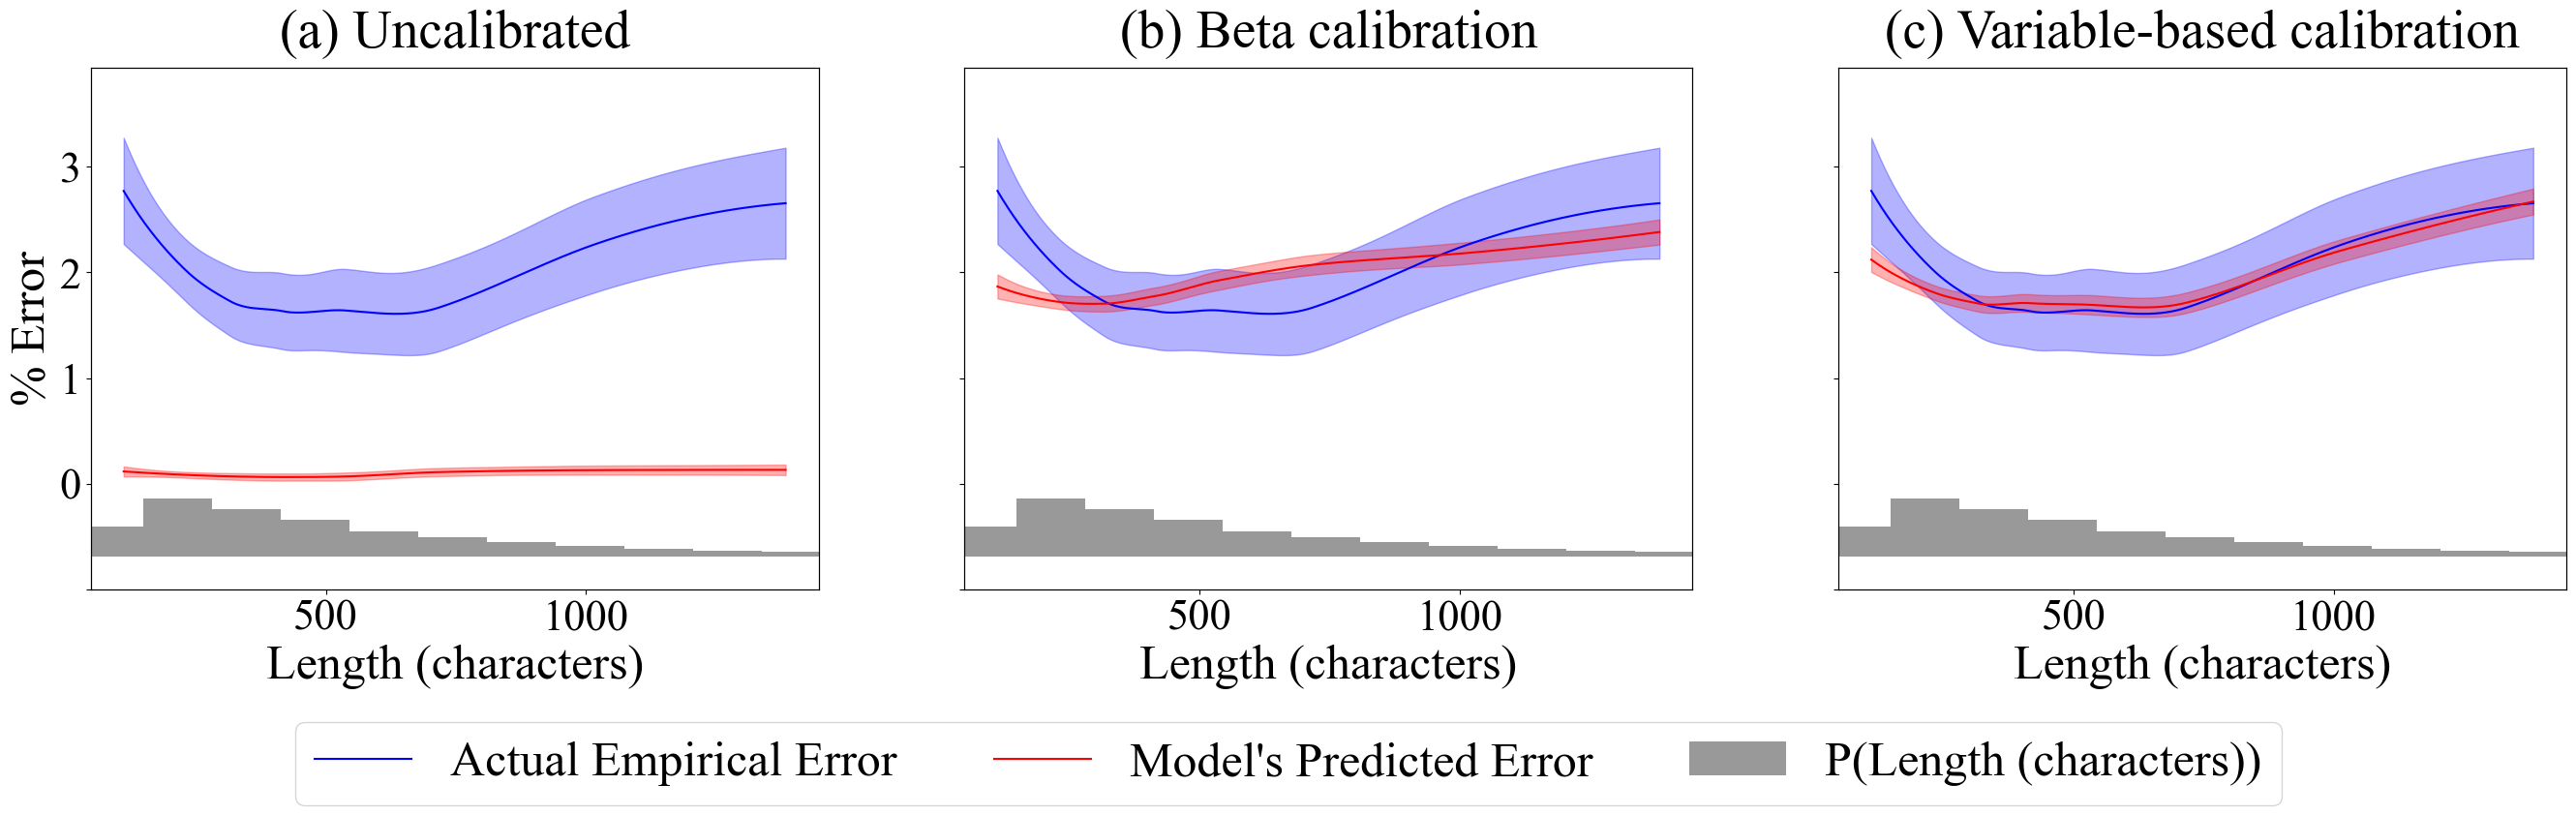

In [7]:
df.plot_compare(var=var,s=0.8,  d=-0.0009, d2=-1, d3=.5, filename='figs/yelp_comparison.png')

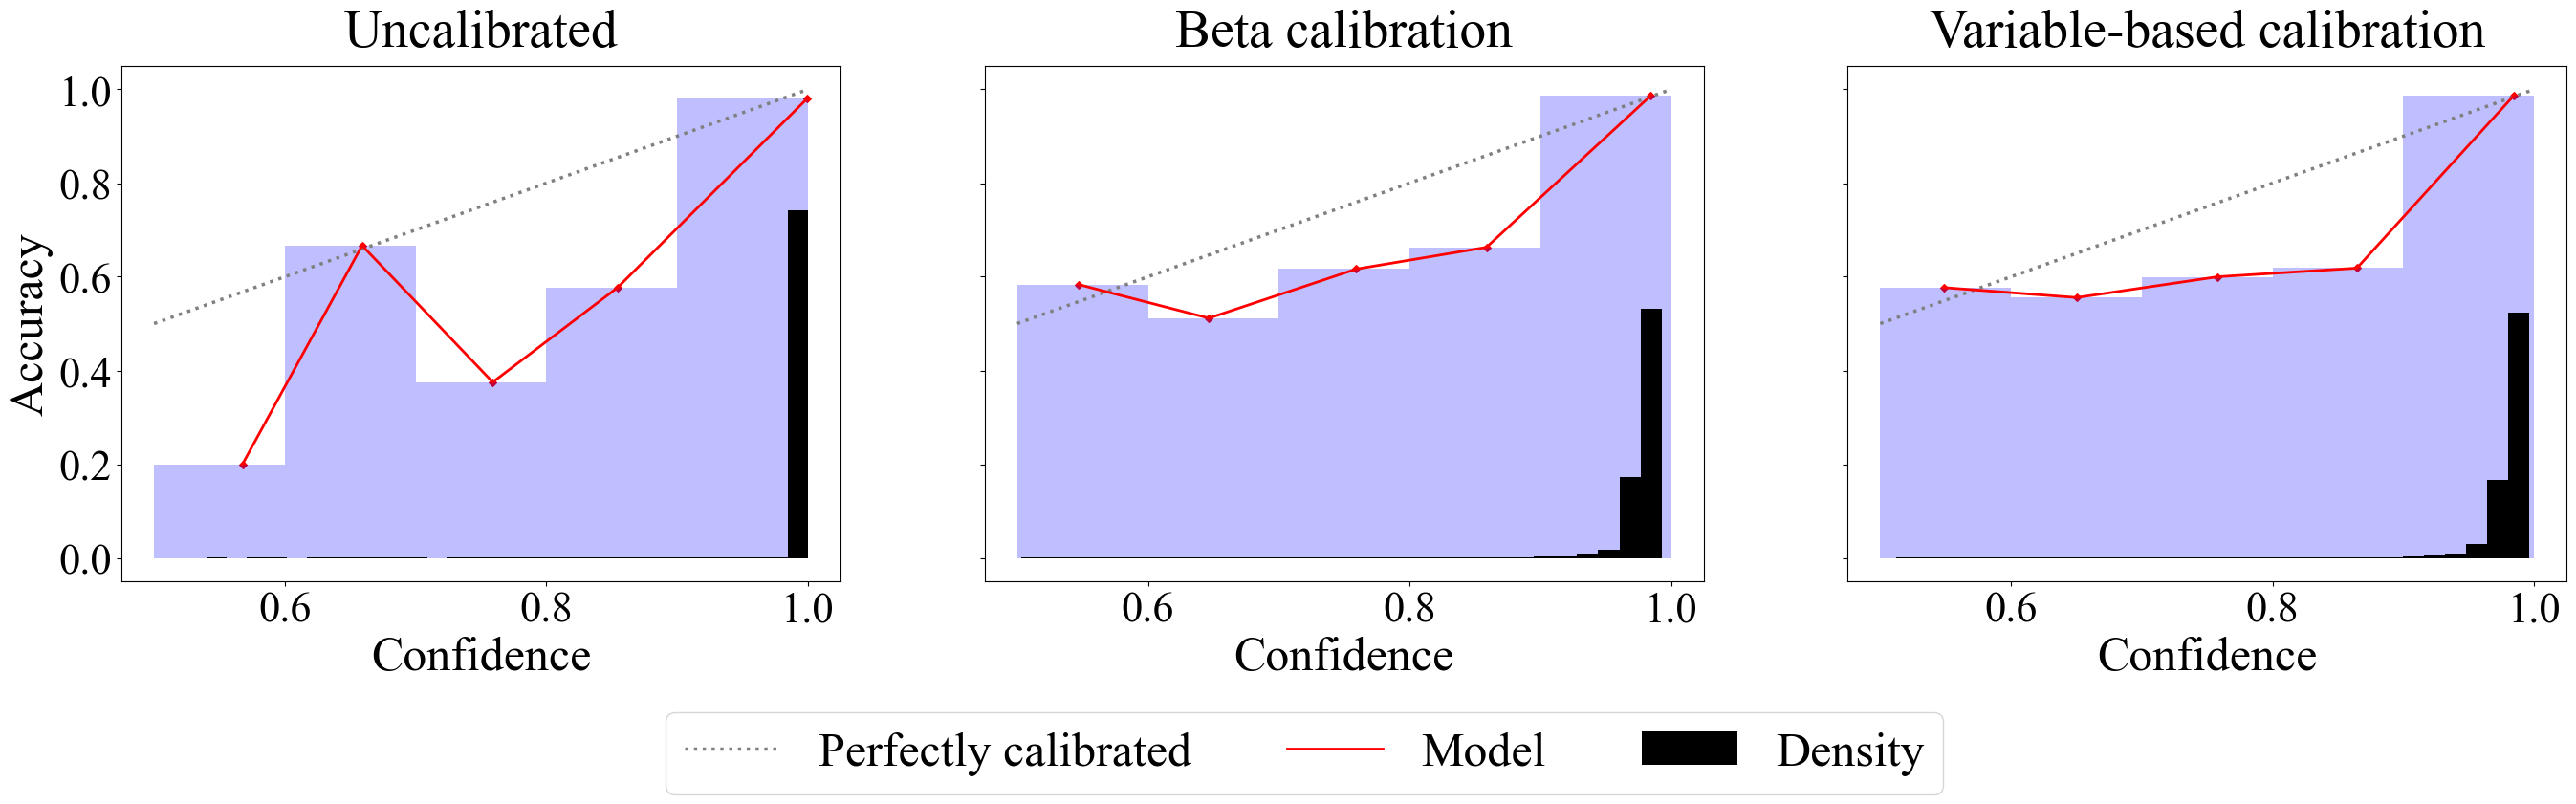

In [8]:
df.rd_compare(hist_weight=0.00004, filename='figs/yelp_reliability.png')

In [9]:
cont = ['len_char', 'stop_prop', 'named_ents']

In [10]:
for col in cont:
    print(col)
    print(df.compute_VECE(col, label="_beta"))

len_char
0.00366145090572482
stop_prop
0.002908014602263812
named_ents
0.0021232047504687757


In [11]:
print('uncalibrated accuracy=',df.compute_accuracy())
print("Beta calibrated accuracy=",df.compute_accuracy(label="_beta"))
print("Variable-wise calibrated accuracy=",df.compute_accuracy(label="_split"))

uncalibrated accuracy= 0.9797185208968802
Beta calibrated accuracy= 0.9796650077594049
Variable-wise calibrated accuracy= 0.9795579814844544


In [12]:
bins=10

In [13]:
print("uncalibrated ECE=",df.compute_ECE(num_bins=bins))
print("Kumar calibrated ECE=",df.compute_ECE(label="_kumar", num_bins=bins))
print("Logistic calibrated ECE=", df.compute_ECE(label="_log", num_bins=bins))
print("Beta calibrated ECE=", df.compute_ECE(label="_beta", num_bins=bins))
print("Variable-wise calibrated ECE=",df.compute_ECE(label="_split", num_bins=bins))
print("Beta-z calibrated ECE=",df.compute_ECE(label="_betaz", num_bins=bins))

uncalibrated ECE= 0.019339917180874973
Kumar calibrated ECE= 0.042283494063998714
Logistic calibrated ECE= 0.030385557256882544
Beta calibrated ECE= 0.017331118530983916
Variable-wise calibrated ECE= 0.01704464192399016
Beta-z calibrated ECE= 0.017291979956104403


In [14]:
print("uncalibrated VECE =",df.compute_VECE(var=var, num_bins=bins))
print("Kumar calibrated VECE =",df.compute_VECE(label="_kumar",var=var, num_bins=bins))
print("Logistic calibrated VECE =",df.compute_VECE(label="_log",var=var, num_bins=bins))
print("Beta calibrated VECE =",df.compute_VECE(label="_beta",var=var, num_bins=bins))
print("Variable-wise calibrated VECE =",df.compute_VECE(label="_split",var=var, num_bins=bins))
print("Beta-z calibrated VECE=",df.compute_VECE(label="_betaz",var=var, num_bins=bins))

uncalibrated VECE = 0.01933099665039672
Kumar calibrated VECE = 0.04228349406399688
Logistic calibrated VECE = 0.006445816564265136
Beta calibrated VECE = 0.00366145090572482
Variable-wise calibrated VECE = 0.0022995678165237355
Beta-z calibrated VECE= 0.0036957343134727373


In [15]:
for col in ['len_char', 'stop_prop', 'named_ents']:
    print(col)
    print("uncalibrated", df.compute_VECE(col))
    print("beta", df.compute_VECE(col, label="_beta"))
    print("variable-wise", df.compute_VECE(col, label="_split"))
    print()

len_char
uncalibrated 0.01933099665039672
beta 0.00366145090572482
variable-wise 0.0022995678165237355

stop_prop
uncalibrated 0.019330996650396715
beta 0.002908014602263812
variable-wise 0.0028279579921501024

named_ents
uncalibrated 0.01933099665039672
beta 0.0021232047504687757
variable-wise 0.0022048111616893152

